# 1. Latar Belakang

Dalam proyek ini, saya berperan sebagai seorang **Data Analyst** di sebuah perusahaan retail supermarket.
Tujuan utama dari proyek ini adalah untuk memahami pola perilaku pelanggan berdasarkan data historis pembelian dan informasi demografis, serta merancang segmentasi pelanggan yang dapat digunakan untuk menyusun strategi pemasaran yang lebih efektif.

## 1.1 Pernyataan Masalah

Perusahaan ingin mengetahui bagaimana karakteristik pelanggan yang merespons kampanye marketing lalu mengelompokkan pelanggan untuk campaign yang lebih tertarget?



# 2. Data Understanding dan Cleaning

Dataset yang digunakan berjudul **Supermarket Customers** dan berisi informasi demografis, perilaku pembelian, serta respons terhadap promosi dari 2240 pelanggan.

## 2.1 Import Dataset


In [291]:

import pandas as pd

# Load dataset
dataset_path = "D:\\PURWADHIKA SCHOOL\\Material\\Module 2\\Capstone Project\\Dataset"
df = pd.read_csv(f'{dataset_path}/Supermarket_Customers_Cleaned.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_Birth             2240 non-null   int64  
 2   Education              2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2216 non-null   float64
 5   Kid_home               2240 non-null   int64  
 6   Teen_home              2240 non-null   int64  
 7   Dt_Customer            2240 non-null   object 
 8   Recency                2240 non-null   int64  
 9   Mnt_Wines              2240 non-null   int64  
 10  Mnt_Fruits             2240 non-null   int64  
 11  Mnt_Meat_Products      2240 non-null   int64  
 12  Mnt_Fish_Products      2240 non-null   int64  
 13  Mnt_Sweet_Products     2240 non-null   int64  
 14  Mnt_Gold_Prods         2240 non-null   int64  
 15  Num_

,ID,Year_Birth,Education,Marital_Status,Income,Kid_home,Teen_home,Dt_Customer,Recency,Mnt_Wines,...,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_VisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,3,6,5,0,0,0,0,0,0,0


**1. People (Data Demografis)**
- ID: ID unik pelanggan.
- Year_Birth: Tahun kelahiran pelanggan.
- Education: Tingkat pendidikan.
- Marital_Status: Status pernikahan.
- Income: Pendapatan tahunan (ada 24 missing values).
- Kid_home, Teen_home: Jumlah anak-anak & remaja di rumah.
- Dt_Customer: Tanggal mulai menjadi pelanggan.
- Recency: Hari sejak pembelian terakhir.
- Complain: Apakah pernah komplain dalam 2 tahun terakhir (1/0).

**2. Products (Pengeluaran selama 2 tahun terakhir)**
- Mnt_Wines, Mnt_Fruits, Mnt_Meat_Products, Mnt_Fish_Products, Mnt_Sweet_Products, Mnt_Gold_Prods: Total pengeluaran masing-masing kategori.

**3. Promotion (Kampanye marketing)**
- Num_Deals_Purchases: Jumlah pembelian dengan diskon.
- AcceptedCmp1–AcceptedCmp5: Respon terhadap 5 kampanye sebelumnya (1 = diterima).
- Response: Respon terhadap kampanye terakhir.

**4. Place (Channel pembelian & aktivitas online)**
- Num_Web_Purchases, Num_Catalog_Purchases, Num_Store_Purchases: Jumlah pembelian dari masing-masing channel.
- Num_Web_VisitsMonth: Kunjungan ke website bulan lalu.


### 2.2 Missing Value & Outlier Check

Kita melakukan identifikasi missing value dan deteksi outlier pada kolom `Income`.


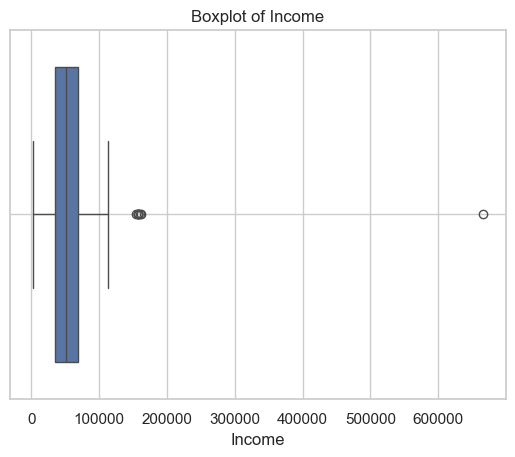

In [292]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Missing value
df.isnull().sum()

# Visualisasi boxplot Income
sns.boxplot(x=df["Income"])
plt.title("Boxplot of Income")
plt.grid(True)
plt.show()


In [293]:
df_sorted_income = df.sort_values(by="Income", ascending=False).head(5)
df_sorted_income[["ID", "Income"]]


,ID,Income
2233,9432,666666.0
617,1503,162397.0
687,1501,160803.0
1300,5336,157733.0
164,8475,157243.0


In [294]:
# Lihat semua nilai unik
print(df['Marital_Status'].unique())

# Hitung frekuensi setiap nilai
print(df['Marital_Status'].value_counts())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64



### 2.3 Data Cleaning

- Drop outlier Income > 200000.
- Gabungkan Kid_home dan Teen_home menjadi Children
- Gabungkan pengeluaran semua produk
- Imputasi Income yang kosong berdasarkan median grup (Education, Marital_Status).
- Ubah YOLO, Absurd, Alone menjadi kategori "Other" atau buang jika jumlah terlalu kecil.
- Drop Kolom yang tidak diperlukan


In [295]:
df_clean = df.copy()

# 1. Hapus outlier income
df_clean = df_clean[df_clean["Income"] <= 200000]

# 2. Gabungkan children
df_clean["Children"] = df_clean["Kid_home"] + df_clean["Teen_home"]

# Gabungkan pengeluaran semua produk
df_clean['TotalSpending'] = df[['Mnt_Wines','Mnt_Fruits','Mnt_Meat_Products',
                          'Mnt_Fish_Products','Mnt_Sweet_Products','Mnt_Gold_Prods']].sum(axis=1)

# 3. Normalisasi marital status
df_clean["Marital_Status"] = df_clean["Marital_Status"].replace({
    "Widow": "Divorced",
    "Together": "Married",
    "Alone": "Single",
    "Absurd": "Other",
    "YOLO": "Other"
})

# 4. Hitung median income untuk imputasi
median_map = (
    df_clean.groupby(["Education", "Marital_Status"])["Income"]
    .median()
    .reset_index()
    .rename(columns={"Income": "Median_Income"})
)

df_clean = df_clean.merge(median_map, on=["Education", "Marital_Status"], how="left")
df_clean["Income"] = df_clean["Income"].fillna(df_clean["Median_Income"])
df_clean.drop(columns="Median_Income", inplace=True)

# 5. Drop kolom yang tidak diperlukan
df_clean.drop(columns=["ID", "Dt_Customer", "Year_Birth", "Kid_home", "Teen_home"], inplace=True)

# 6. Verifikasi akhir
print("Missing Income:", df_clean["Income"].isnull().sum())
print("Max Income:", df_clean["Income"].max())


Missing Income: 0
Max Income: 162397.0


## Data yang sudah dibersihkan

In [296]:
listItem = []
for col in df_clean.columns:
    unique_vals = df_clean[col].drop_duplicates()
    sample_vals = list(unique_vals.sample(2).values) if unique_vals.shape[0] >= 2 else list(unique_vals.values)
    
    listItem.append([
        col,
        df_clean[col].dtype,
        df_clean[col].isna().sum(),
        df_clean[col].nunique(),
        sample_vals
    ])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)

print(df.shape)
dfDesc

(2240, 27)


,dataFeatures,dataType,null,unique,uniqueSample
0,Education,object,0,5,"[Basic, 2n Cycle]"
1,Marital_Status,object,0,4,"[Other, Single]"
2,Income,float64,0,1973,"[55563.0, 46734.0]"
3,Recency,int64,0,100,"[21, 28]"
4,Mnt_Wines,int64,0,776,"[50, 583]"
5,Mnt_Fruits,int64,0,158,"[98, 80]"
6,Mnt_Meat_Products,int64,0,554,"[121, 234]"
7,Mnt_Fish_Products,int64,0,182,"[153, 164]"
8,Mnt_Sweet_Products,int64,0,176,"[108, 178]"
9,Mnt_Gold_Prods,int64,0,212,"[204, 85]"


# Data Analysis

## Distribusi demografi (Education, Marital_Status, Children, Income, dan Total Spending) vs Response

Berikut adalah hasil EDA tahap awal untuk memahami karakteristik pelanggan yang merespons kampanye marketing

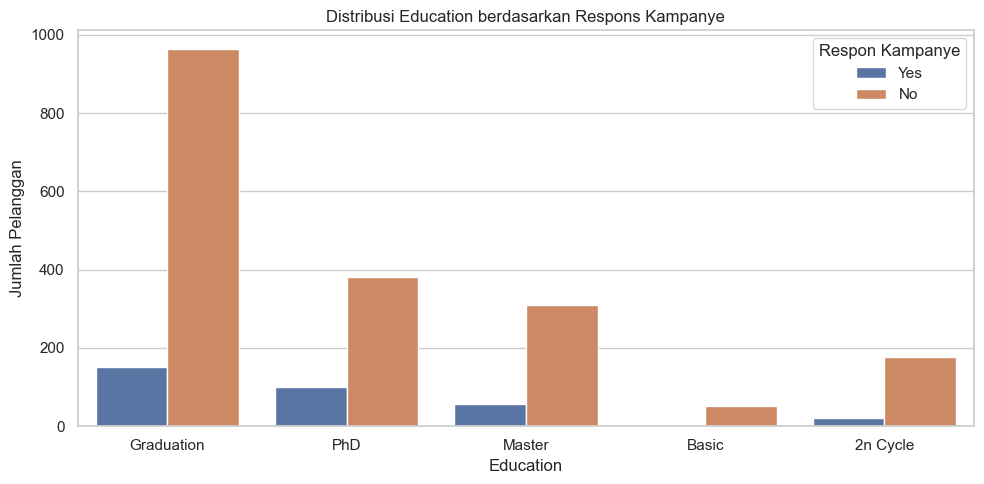

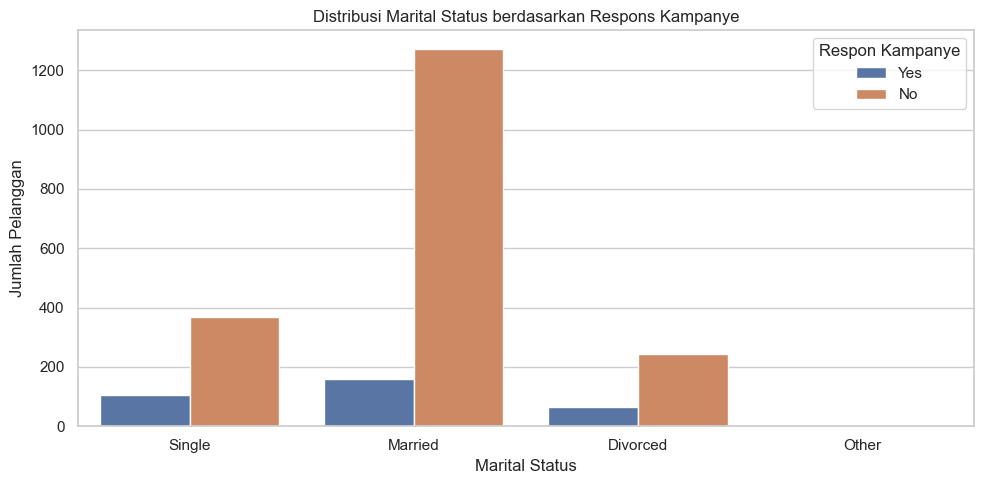

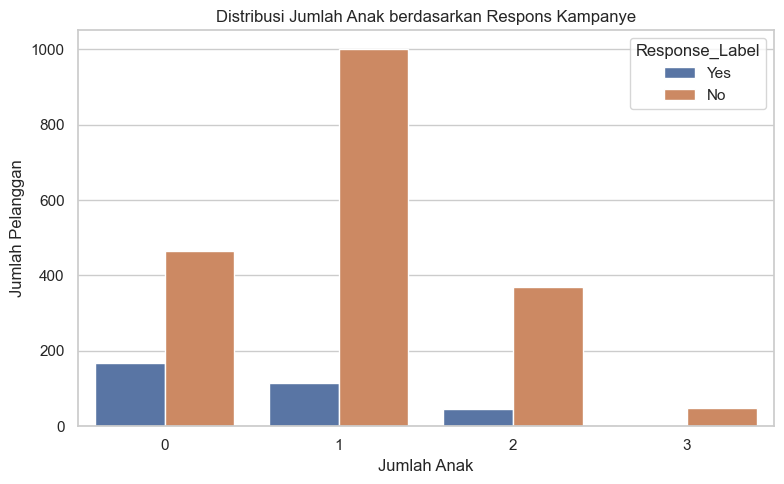

Text(0.5, 1.0, 'Distribusi Income berdasarkan Respons Kampanye')

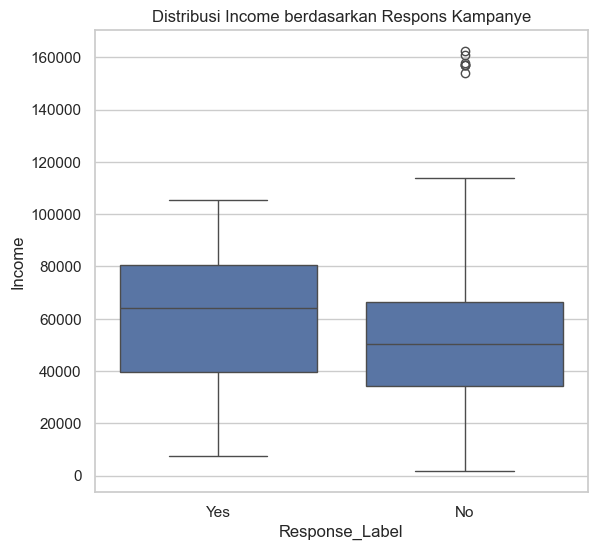

In [297]:
df_clean["Response_Label"] = df_clean["Response"].map({1: "Yes", 0: "No"})

# 1. Distribusi Education vs Response
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x="Education", hue="Response_Label")
plt.title("Distribusi Education berdasarkan Respons Kampanye")
plt.xlabel("Education")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Respon Kampanye")
plt.tight_layout()
plt.show()

# 2. Distribusi Marital Status vs Response
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x="Marital_Status", hue="Response_Label")
plt.title("Distribusi Marital Status berdasarkan Respons Kampanye")
plt.xlabel("Marital Status")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Respon Kampanye")
plt.tight_layout()
plt.show()

# 3. Distribusi Jumlah Anak (Children) vs Response
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x="Children", hue="Response_Label")
plt.title("Distribusi Jumlah Anak berdasarkan Respons Kampanye")
plt.xlabel("Jumlah Anak")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

# 4. Perbandingan Income dan Total Spending
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x="Response_Label", y="Income")
plt.title("Distribusi Income berdasarkan Respons Kampanye")


- **1. Education vs Response**

Pelanggan dengan tingkat pendidikan Graduation dan PhD merupakan jumlah terbesar yang merespons. Namun secara proporsi, tidak ada pendidikan yang secara signifikan lebih tinggi tingkat responnya.

**Insight: Tingkat pendidikan bukan penentu utama, tapi kelompok terdidik lebih banyak muncul di seluruh segmen pelanggan.**

- **2. Marital Status vs Response**
Married adalah kelompok dominan dari sisi jumlah. Namun Single dan Divorced tampak memiliki proporsi respons sedikit lebih tinggi.

**Insight: Pelanggan yang tidak dalam hubungan rumah tangga mungkin lebih responsif terhadap penawaran langsung atau promosi pribadi.**

- **3. Children vs Response**
Pelanggan dengan 0 anak adalah yang paling banyak merespons. Pelanggan dengan lebih banyak anak tampaknya cenderung kurang responsif.

**Insight: Pelanggan tanpa tanggungan lebih terbuka terhadap promosi baru atau upselling.**

- **4. Income & Total Spending vs Response**
Distribusi income antara pelanggan yang merespons dan tidak tidak terlalu berbeda. Total spending jauh lebih tinggi pada pelanggan yang merespons kampanye!

**Insight: Pelanggan yang sudah sering belanja sebelumnya (high spender) lebih cenderung merespons kampanye berikutnya.**

## Bagaimana karakteristik pelanggan yang merespons kampanye marketing?

- Channel pembelian dan kunjungan web vs Response
- Respon kampanye sebelumnya (AcceptedCmp1–5)
- Pola Recency dan Complain

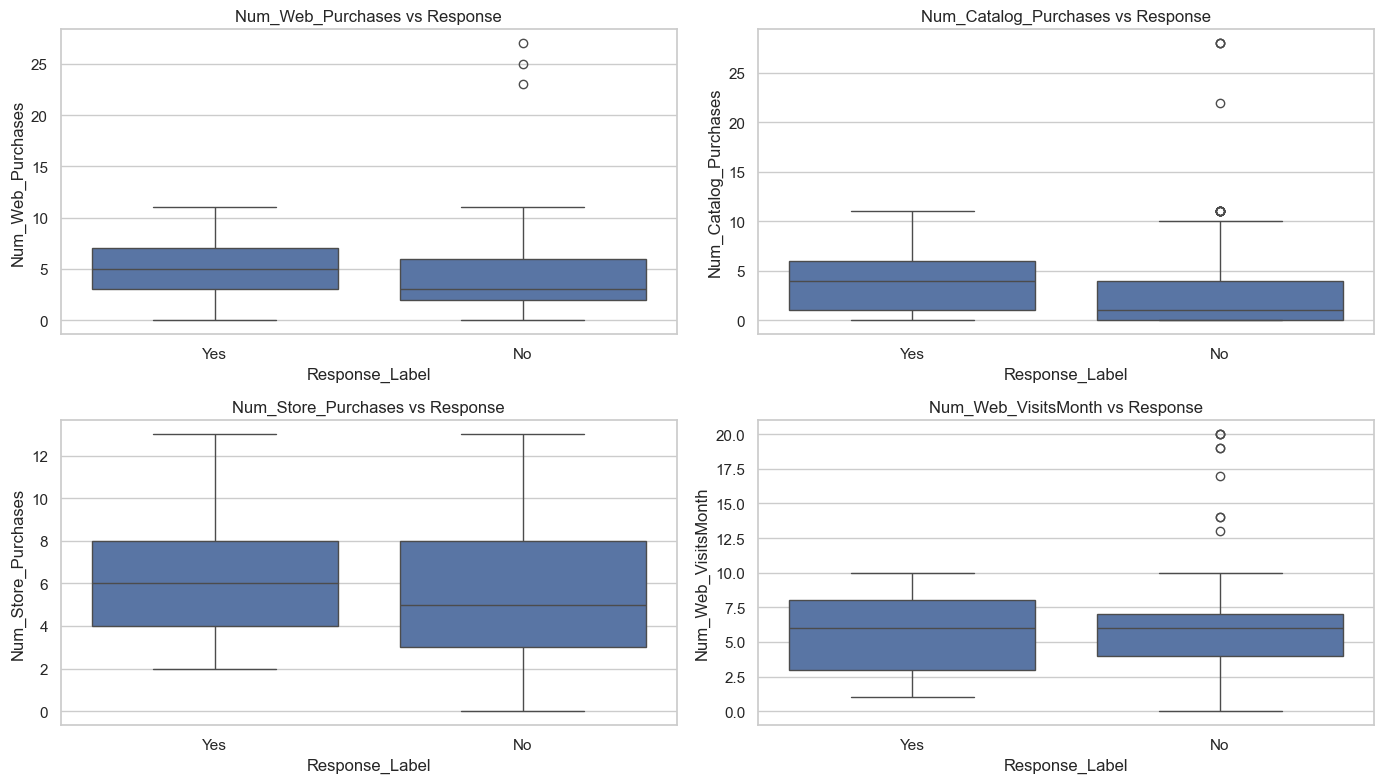

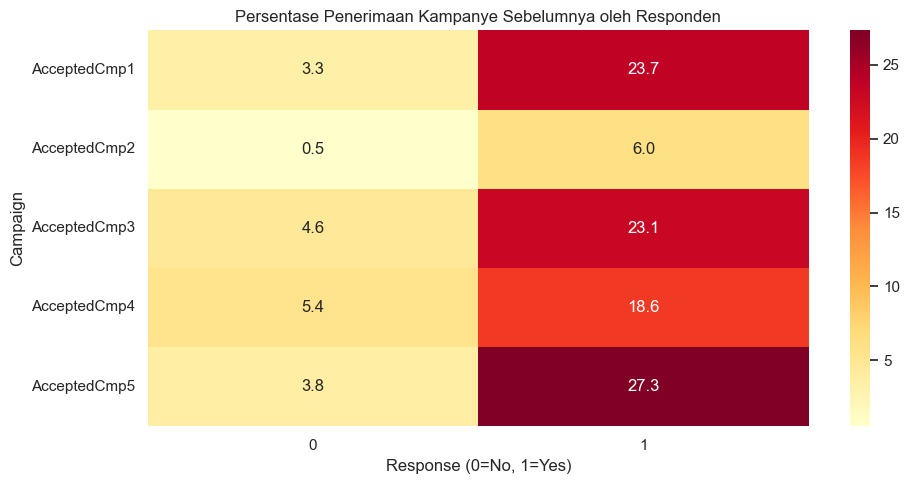

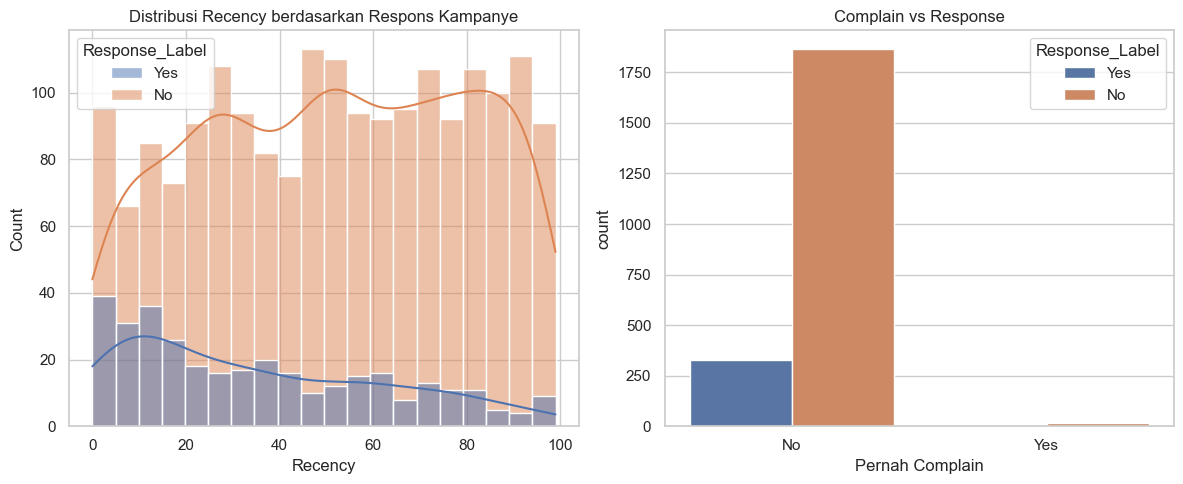

In [298]:
# 5. Channel Pembelian vs Response (Web, Store, Catalog)
channel_cols = ["Num_Web_Purchases", "Num_Catalog_Purchases", "Num_Store_Purchases", "Num_Web_VisitsMonth"]

plt.figure(figsize=(14, 8))
for i, col in enumerate(channel_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df_clean, x="Response_Label", y=col)
    plt.title(f"{col} vs Response")
plt.tight_layout()
plt.show()

# 6. Kampanye Sebelumnya (AcceptedCmp1–5) vs Response
accepted_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
campaign_response = df_clean.groupby("Response")[accepted_cols].mean() * 100

# Visualisasi
plt.figure(figsize=(10, 5))
sns.heatmap(campaign_response.T, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Persentase Penerimaan Kampanye Sebelumnya oleh Responden")
plt.xlabel("Response (0=No, 1=Yes)")
plt.ylabel("Campaign")
plt.tight_layout()
plt.show()

# 7. Distribusi Recency dan Complain
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_clean, x="Recency", hue="Response_Label", kde=True, bins=20)
plt.title("Distribusi Recency berdasarkan Respons Kampanye")

plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x="Complain", hue="Response_Label")
plt.title("Complain vs Response")
plt.xticks([0, 1], ["No", "Yes"])
plt.xlabel("Pernah Complain")
plt.tight_layout()
plt.show()

- 1. Channel Pembelian vs Response

Pelanggan yang merespons (Response = 1) Lebih banyak pembelian lewat katalog dan web Sedikit lebih aktif di store daripada yang tidak merespons Kunjungan web bulanan (Num_Web_VisitsMonth) tidak terlalu berbeda

**Insight: Channel katalog dan web lebih banyak digunakan oleh pelanggan yang responsif → potensi besar untuk e-campaign.**

- 2. Respons terhadap Kampanye Sebelumnya (Cmp1–Cmp5)

Pelanggan yang merespons kampanye terakhir (Response = 1) juga cenderung pernah merespons kampanye sebelumnya.bAcceptedCmp5 dan Cmp1 memiliki korelasi tertinggi dengan Response.

**Insight: Ada pola respon konsisten antar kampanye. Pelanggan yang pernah merespons sebelumnya lebih cenderung merespons lagi.**

- 3. Recency dan Complain
Pelanggan yang merespons cenderung memiliki Recency lebih rendah → artinya mereka lebih aktif baru-baru ini. Hampir semua pelanggan yang merespons tidak pernah komplain dalam 2 tahun terakhir.

**Insight: Pelanggan aktif dan tidak pernah komplain lebih mungkin merespons kampanye baru.**



## Proses segmentasi pelanggan

C:\Users\DANDIN AKMAL\AppData\Local\Temp\ipykernel_10136\3122372913.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x="Cluster_Label", y="TotalSpending", palette="Set2")


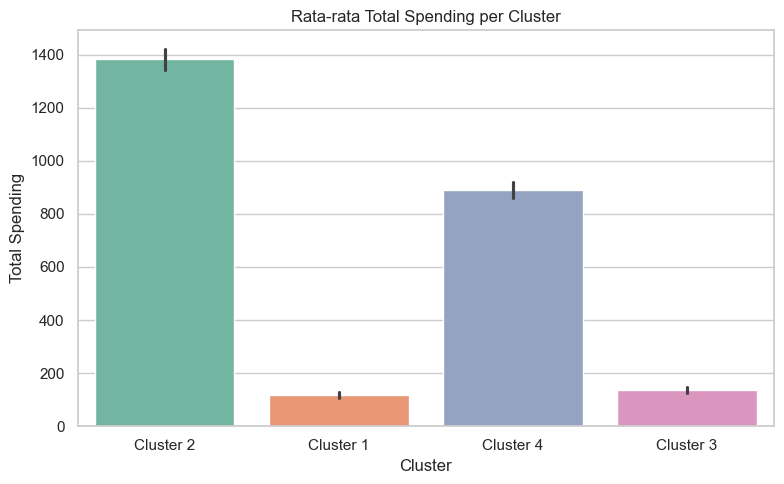

,Income,TotalSpending,Children,Recency,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_VisitsMonth,Response
Cluster_Label,,,,,,,,,
Cluster 1,34511.18,117.45,1.18,23.76,2.31,0.60,3.36,6.58,0.16
Cluster 2,77799.35,1382.15,0.13,50.95,4.50,6.33,8.26,2.33,0.28
Cluster 3,36957.25,135.92,1.31,74.56,2.47,0.77,3.54,6.35,0.04
Cluster 4,61766.91,888.29,1.06,47.36,7.08,3.45,8.33,5.63,0.14


In [299]:
# Fitur yang digunakan untuk clustering
cluster_features = df_clean[[
    "Income", "TotalSpending", "Children", "Recency",
    "Num_Web_Purchases", "Num_Catalog_Purchases", "Num_Store_Purchases",
    "Num_Web_VisitsMonth"
]]

# Standarisasi data
scaler = StandardScaler()
scaled_cluster_features = scaler.fit_transform(cluster_features)

# Jalankan KMeans (4 klaster)
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(scaled_cluster_features)

# Mapping label untuk legenda yang lebih informatif (1, 2, 3, 4)
df_clean["Cluster_Label"] = df_clean["Cluster"].map({
    0: "Cluster 1",
    1: "Cluster 2",
    2: "Cluster 3",
    3: "Cluster 4"
})

# (Opsional) Jika kamu ingin visualisasi berbasis fitur, bisa gunakan:
# Contoh: rata-rata Total Spending per klaster
plt.figure(figsize=(8, 5))
sns.barplot(data=df_clean, x="Cluster_Label", y="TotalSpending", palette="Set2")
plt.title("Rata-rata Total Spending per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Spending")
plt.tight_layout()
plt.show()

# Ringkasan karakteristik tiap cluster
cluster_summary = df_clean.groupby("Cluster_Label")[[
    "Income", "TotalSpending", "Children", "Recency",
    "Num_Web_Purchases", "Num_Catalog_Purchases", "Num_Store_Purchases",
    "Num_Web_VisitsMonth", "Response"
]].mean().round(2)

cluster_summary

## Insight Segmentasi

A. Cluster 1 – Budget Families
- Income & spending rendah
- Banyak anak
- Respon cukup baik (16%) walau spending rendah
- Cocok untuk campaign diskon keluarga

B. Cluster 2 – High Value Segment
- Income & spending tertinggi
- Pembelian aktif di semua channel
- Respons terhadap kampanye paling tinggi (28%)
- Target utama untuk campaign digital, eksklusif, atau loyalty program

D. Cluster 3 – Low Impact
- Spending & response sangat rendah
- Recency tinggi → sudah lama tidak aktif
- Segmentasi tidak prioritas

C. Cluster 4 – Digital-Engaged Buyers
- Web Purchases tertinggi
- Respon sedang (14%)
- Fokus pada campaign online & retargeting khusus channel digital



# Kesimpulan dan Rekomendasi

**Kesimpulan**

Karakteristik Pelanggan yang Responsif terhadap Kampanye Berdasarkan analisis EDA terhadap 2.215 pelanggan:

- Hanya 15% pelanggan yang merespons kampanye terakhir.
- Pelanggan yang merespons cenderung memiliki:
- Total spending tinggi
- Recency rendah → baru belanja
- Tidak memiliki anak
- Aktif belanja melalui katalog & web
- Pernah merespons kampanye sebelumnya
- Hampir tidak pernah komplain
- Ini menunjukkan bahwa pelanggan aktif, loyal, dan high spender adalah target utama.



**Rekomendasi Strategis**

**1. Fokus Campaign ke Cluster 2 (High Value Segment)**
- Mereka paling responsif (28%)
- Income & spending tertinggi
- Gunakan:
    - Email eksklusif
    - Bundling produk premium
    - Loyalty program berbasis reward point

**2. Kembangkan Digital Campaign untuk Cluster 4 (Digital-Engaged)**
- Aktif di web dan katalog
- Potensi tinggi untuk retargeting & campaign online
- Gunakan:
    - push notification
    - digital coupon

**3. Edukasi dan Diskon untuk Cluster 1 (Budget Families)**
- Spending rendah, tetapi ada respons positif
- Cocok untuk:
    - Paket keluarga hemat
    - Diskon berbasis kebutuhan rumah tangga
    - Upselling produk sehari-hari

**4. Minimalkan Upaya di Cluster 3**
- Respons sangat rendah (4%)
- Spending & aktivitas minim
- Gunakan re-engagement ringan: voucher "Lagi banyak diskon loh!!!"

In [300]:
path_destination = 'D:\\PURWADHIKA SCHOOL\\Material\\Module 2\\Capstone Project\\Dataset'
df_clean.to_csv(f"{path_destination}/df_clean.csv", index=False)
